In [47]:
import pandas as pd
import matplotlib.pyplot as plt

In [48]:
# Load CSV file
file_path = "C:\\Users\\krits\\vscodeWorkspaces\\Jupyter_Notebook\\LSTM_Model\\CSV_SIGNAL\\CSV_2\\20250320_280_380V_10A_4.csv"  # Change this to your actual file path
df = pd.read_csv(file_path, parse_dates=['DateTime'])
df_for_save = pd.read_csv(file_path, parse_dates=['DateTime'])
# Set DateTime as index for better plotting
df.set_index("DateTime", inplace=True)

# Display first few rows
# print(df.head())

# Basic statistics
# print(df.describe())

In [49]:
df

,Name,HV_SwitchingFreq_Rail1,VS_Bulk_HvDc,CS_Shunt_HVDC_R1,HV_OutPwr,VS_Vout_Sense_HVDC,MainsRMSCurrent,MainsRMSVoltage,Unnamed: 9
DateTime,,,,,,,,,
2025-03-20 09:10:52,280_380V_10A_4,300,1.8,0.09,25.0,279.4,0.0,219.0,NaN
2025-03-20 09:10:54,280_380V_10A_4,300,2.0,0.09,25.0,279.4,0.0,219.0,NaN
2025-03-20 09:10:55,280_380V_10A_4,300,2.0,0.09,25.0,279.4,0.0,219.0,NaN
2025-03-20 09:10:55,280_380V_10A_4,300,19.0,0.09,25.0,279.4,0.4,219.0,NaN
2025-03-20 09:10:56,280_380V_10A_4,300,435.7,0.09,25.0,279.4,0.5,219.0,NaN
...,...,...,...,...,...,...,...,...,...
2025-03-20 09:12:40,280_380V_10A_4,233,703.0,9.99,2795.0,279.5,4.4,218.5,NaN
2025-03-20 09:12:41,280_380V_10A_4,232,703.2,9.99,2795.0,279.5,4.4,218.5,NaN
2025-03-20 09:12:41,280_380V_10A_4,232,702.7,9.99,2795.0,279.6,4.4,218.5,NaN


In [50]:
df.drop(columns=["Name", "Unnamed: 9"], inplace=True)
df_for_save.drop(columns=["Name", "Unnamed: 9"], inplace=True)

In [51]:
df.drop(df.index[-1], inplace=True)
df_for_save.drop(df_for_save.index[-1], inplace=True)

In [52]:
df

,HV_SwitchingFreq_Rail1,VS_Bulk_HvDc,CS_Shunt_HVDC_R1,HV_OutPwr,VS_Vout_Sense_HVDC,MainsRMSCurrent,MainsRMSVoltage
DateTime,,,,,,,
2025-03-20 09:10:52,300,1.8,0.09,25.0,279.4,0.0,219.0
2025-03-20 09:10:54,300,2.0,0.09,25.0,279.4,0.0,219.0
2025-03-20 09:10:55,300,2.0,0.09,25.0,279.4,0.0,219.0
2025-03-20 09:10:55,300,19.0,0.09,25.0,279.4,0.4,219.0
2025-03-20 09:10:56,300,435.7,0.09,25.0,279.4,0.5,219.0
...,...,...,...,...,...,...,...
2025-03-20 09:12:39,232,702.6,9.99,2796.0,279.6,4.4,219.0
2025-03-20 09:12:40,233,703.0,9.99,2795.0,279.5,4.4,218.5
2025-03-20 09:12:41,232,703.2,9.99,2795.0,279.5,4.4,218.5


In [53]:
df_for_save

,DateTime,HV_SwitchingFreq_Rail1,VS_Bulk_HvDc,CS_Shunt_HVDC_R1,HV_OutPwr,VS_Vout_Sense_HVDC,MainsRMSCurrent,MainsRMSVoltage
0,2025-03-20 09:10:52,300,1.8,0.09,25.0,279.4,0.0,219.0
1,2025-03-20 09:10:54,300,2.0,0.09,25.0,279.4,0.0,219.0
2,2025-03-20 09:10:55,300,2.0,0.09,25.0,279.4,0.0,219.0
3,2025-03-20 09:10:55,300,19.0,0.09,25.0,279.4,0.4,219.0
4,2025-03-20 09:10:56,300,435.7,0.09,25.0,279.4,0.5,219.0
...,...,...,...,...,...,...,...,...
213,2025-03-20 09:12:39,232,702.6,9.99,2796.0,279.6,4.4,219.0
214,2025-03-20 09:12:40,233,703.0,9.99,2795.0,279.5,4.4,218.5
215,2025-03-20 09:12:41,232,703.2,9.99,2795.0,279.5,4.4,218.5
216,2025-03-20 09:12:41,232,702.7,9.99,2795.0,279.6,4.4,218.5


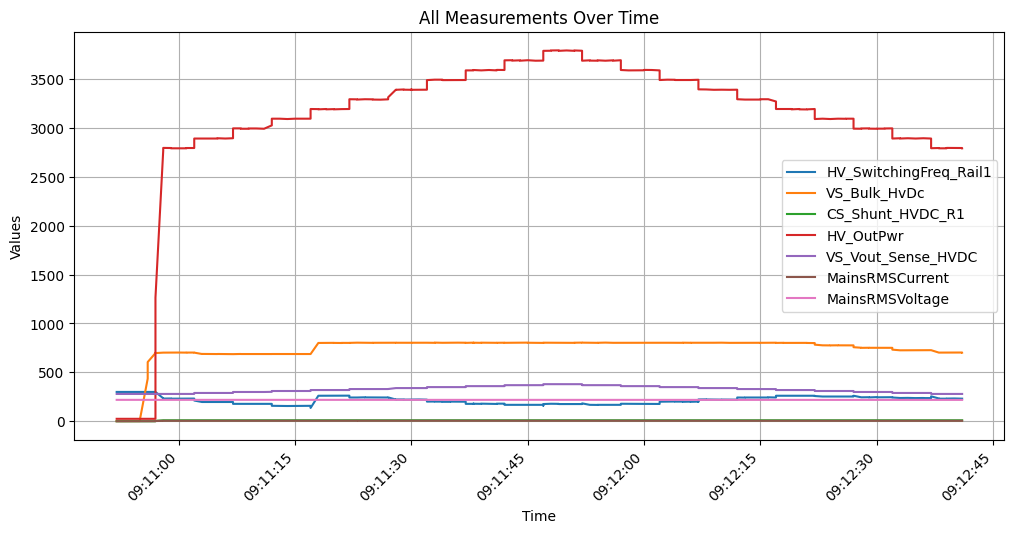

In [54]:
# Plot all numerical columns
df.plot(figsize=(12, 6), marker='', linestyle='-')
plt.xlabel("Time")
plt.ylabel("Values")
plt.title("All Measurements Over Time")
plt.xticks(rotation=45)
plt.legend(loc='best')
plt.grid()
plt.show()

In [55]:
df_for_save['DateTime'][len(df_for_save)-1]

Timestamp('2025-03-20 09:12:41')

In [56]:
import numpy as np
import pandas as pd

# Assuming df is already defined and the 'DateTime' column is in datetime format

# 2. Get the number of rows in the DataFrame
num_rows = len(df_for_save)

# 1. Calculate the total time difference in seconds between the first and last DateTime
time_diff_seconds = (df_for_save['DateTime'][num_rows - 1] - df_for_save['DateTime'][0]).total_seconds()
print(f"Diff time {time_diff_seconds}")


# 3. Generate the line using np.linspace
line = np.linspace(0, time_diff_seconds, num_rows)

# 4. Append the generated line as a new column to the DataFrame
df_for_save['TimeLine'] = line

# Display the updated DataFrame
print(df_for_save.head())


Diff time 109.0
             DateTime  HV_SwitchingFreq_Rail1  VS_Bulk_HvDc  CS_Shunt_HVDC_R1  \
0 2025-03-20 09:10:52                     300           1.8              0.09   
1 2025-03-20 09:10:54                     300           2.0              0.09   
2 2025-03-20 09:10:55                     300           2.0              0.09   
3 2025-03-20 09:10:55                     300          19.0              0.09   
4 2025-03-20 09:10:56                     300         435.7              0.09   

   HV_OutPwr  VS_Vout_Sense_HVDC  MainsRMSCurrent  MainsRMSVoltage  TimeLine  
0       25.0               279.4              0.0            219.0  0.000000  
1       25.0               279.4              0.0            219.0  0.502304  
2       25.0               279.4              0.0            219.0  1.004608  
3       25.0               279.4              0.4            219.0  1.506912  
4       25.0               279.4              0.5            219.0  2.009217  


In [57]:
df_for_save

,DateTime,HV_SwitchingFreq_Rail1,VS_Bulk_HvDc,CS_Shunt_HVDC_R1,HV_OutPwr,VS_Vout_Sense_HVDC,MainsRMSCurrent,MainsRMSVoltage,TimeLine
0,2025-03-20 09:10:52,300,1.8,0.09,25.0,279.4,0.0,219.0,0.000000
1,2025-03-20 09:10:54,300,2.0,0.09,25.0,279.4,0.0,219.0,0.502304
2,2025-03-20 09:10:55,300,2.0,0.09,25.0,279.4,0.0,219.0,1.004608
3,2025-03-20 09:10:55,300,19.0,0.09,25.0,279.4,0.4,219.0,1.506912
4,2025-03-20 09:10:56,300,435.7,0.09,25.0,279.4,0.5,219.0,2.009217
...,...,...,...,...,...,...,...,...,...
213,2025-03-20 09:12:39,232,702.6,9.99,2796.0,279.6,4.4,219.0,106.990783
214,2025-03-20 09:12:40,233,703.0,9.99,2795.0,279.5,4.4,218.5,107.493088
215,2025-03-20 09:12:41,232,703.2,9.99,2795.0,279.5,4.4,218.5,107.995392
216,2025-03-20 09:12:41,232,702.7,9.99,2795.0,279.6,4.4,218.5,108.497696


In [58]:
# Remove the 'DateTime' column (it is now the index)
# df.reset_index(drop=True, inplace=True)

In [59]:
# Reorder columns to make 'TimeLine' the first column
cols = ['TimeLine'] + [col for col in df_for_save.columns if col != 'TimeLine']
df_for_save = df_for_save[cols]

# Display the updated DataFrame
print(df_for_save.head())

   TimeLine            DateTime  HV_SwitchingFreq_Rail1  VS_Bulk_HvDc  \
0  0.000000 2025-03-20 09:10:52                     300           1.8   
1  0.502304 2025-03-20 09:10:54                     300           2.0   
2  1.004608 2025-03-20 09:10:55                     300           2.0   
3  1.506912 2025-03-20 09:10:55                     300          19.0   
4  2.009217 2025-03-20 09:10:56                     300         435.7   

   CS_Shunt_HVDC_R1  HV_OutPwr  VS_Vout_Sense_HVDC  MainsRMSCurrent  \
0              0.09       25.0               279.4              0.0   
1              0.09       25.0               279.4              0.0   
2              0.09       25.0               279.4              0.0   
3              0.09       25.0               279.4              0.4   
4              0.09       25.0               279.4              0.5   

   MainsRMSVoltage  
0            219.0  
1            219.0  
2            219.0  
3            219.0  
4            219.0  


In [60]:
df_for_save

,TimeLine,DateTime,HV_SwitchingFreq_Rail1,VS_Bulk_HvDc,CS_Shunt_HVDC_R1,HV_OutPwr,VS_Vout_Sense_HVDC,MainsRMSCurrent,MainsRMSVoltage
0,0.000000,2025-03-20 09:10:52,300,1.8,0.09,25.0,279.4,0.0,219.0
1,0.502304,2025-03-20 09:10:54,300,2.0,0.09,25.0,279.4,0.0,219.0
2,1.004608,2025-03-20 09:10:55,300,2.0,0.09,25.0,279.4,0.0,219.0
3,1.506912,2025-03-20 09:10:55,300,19.0,0.09,25.0,279.4,0.4,219.0
4,2.009217,2025-03-20 09:10:56,300,435.7,0.09,25.0,279.4,0.5,219.0
...,...,...,...,...,...,...,...,...,...
213,106.990783,2025-03-20 09:12:39,232,702.6,9.99,2796.0,279.6,4.4,219.0
214,107.493088,2025-03-20 09:12:40,233,703.0,9.99,2795.0,279.5,4.4,218.5
215,107.995392,2025-03-20 09:12:41,232,703.2,9.99,2795.0,279.5,4.4,218.5
216,108.497696,2025-03-20 09:12:41,232,702.7,9.99,2795.0,279.6,4.4,218.5


In [61]:
df_for_save.drop(columns="DateTime", inplace=True)

C:\Users\krits\AppData\Local\Temp\ipykernel_464\1144685524.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_for_save.drop(columns="DateTime", inplace=True)


In [62]:
df_for_save.reset_index(drop=True, inplace=True)

In [63]:
df_for_save

,TimeLine,HV_SwitchingFreq_Rail1,VS_Bulk_HvDc,CS_Shunt_HVDC_R1,HV_OutPwr,VS_Vout_Sense_HVDC,MainsRMSCurrent,MainsRMSVoltage
0,0.000000,300,1.8,0.09,25.0,279.4,0.0,219.0
1,0.502304,300,2.0,0.09,25.0,279.4,0.0,219.0
2,1.004608,300,2.0,0.09,25.0,279.4,0.0,219.0
3,1.506912,300,19.0,0.09,25.0,279.4,0.4,219.0
4,2.009217,300,435.7,0.09,25.0,279.4,0.5,219.0
...,...,...,...,...,...,...,...,...
213,106.990783,232,702.6,9.99,2796.0,279.6,4.4,219.0
214,107.493088,233,703.0,9.99,2795.0,279.5,4.4,218.5
215,107.995392,232,703.2,9.99,2795.0,279.5,4.4,218.5
216,108.497696,232,702.7,9.99,2795.0,279.6,4.4,218.5


In [64]:
filepath = "Test.csv"
df_for_save.to_csv(filepath)  